<a href="https://colab.research.google.com/github/AdemolaAri/machineLearning/blob/master/SVM_DrugData_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size="5"> SVM (Support Vector Machines): Python</font></h1>

The idea behind SVM is that every data is kinda 'linearly separable'. Even if it is not obvious in a 2-dimensional feature space, it can be mapped to a higher-dimension so that data points can be grouped and categorized together.

When a separator between the categories is found, the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In this notebook, you will use SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [0]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

<h2 id="dataset">About the Dataset</h2>
You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of binary classifier, and you can use the training part of the dataset  to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

In [0]:
!wget -O drugData.csv https://github.com/AdemolaAri/machineLearning/raw/datasets/drugData.csv

--2019-09-19 21:40:43--  https://github.com/AdemolaAri/machineLearning/raw/datasets/drugData.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AdemolaAri/machineLearning/datasets/drugData.csv [following]
--2019-09-19 21:40:44--  https://raw.githubusercontent.com/AdemolaAri/machineLearning/datasets/drugData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/plain]
Saving to: ‘drugData.csv’

drugData.csv        100%[===================>]   5.89K  --.-KB/s    in 0s      

2019-09-19 21:40:44 (72.8 MB/s) - ‘drugData.csv’ saved [6027/6027]



### Load Data From CSV File  

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv("drugData.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [0]:
print(df.describe(), '\n')
print(df['Sex'].value_counts(), '\n')
print(df['BP'].value_counts(), '\n')
print(df['Cholesterol'].value_counts(), '\n')
print(df['Drug'].value_counts())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000 

M    104
F     96
Name: Sex, dtype: int64 

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64 

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64 

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


In [0]:
df['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

## Data pre-processing and selection

In [0]:
X = df.iloc[:, :-1]
X[:10]

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
5,22,F,NORMAL,HIGH,8.607
6,49,F,NORMAL,HIGH,16.275
7,41,M,LOW,HIGH,11.037
8,60,M,NORMAL,HIGH,15.171
9,43,M,LOW,NORMAL,19.368


## Train/Test dataset

Okay, we split our dataset into train and test set:

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(df[['Age', 'Na_to_K']], df['Drug'], test_size=0.25, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_validation.shape,  y_validation.shape)

Train set: (150, 2) (150,)
Validation set: (50, 2) (50,)


<h2 id="modeling">Modeling (SVM with Scikit-learn)</h2>

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [0]:
y_pred = clf.predict(X_validation)
y_pred [0:5]

array(['drugA', 'drugC', 'drugY', 'drugY', 'drugY'], dtype=object)

<h2 id="evaluation">Evaluation</h2>

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       1.00      1.00      1.00         1
       drugC       0.00      0.00      0.00         3
       drugX       0.62      0.50      0.55        16
       drugY       0.81      1.00      0.89        25

    accuracy                           0.68        50
   macro avg       0.48      0.50      0.49        50
weighted avg       0.62      0.68      0.64        50

Confusion matrix, without normalization
[[ 0  0  0  4  1]
 [ 0  1  0  0  0]
 [ 1  0  0  1  1]
 [ 2  0  2  8  4]
 [ 0  0  0  0 25]]


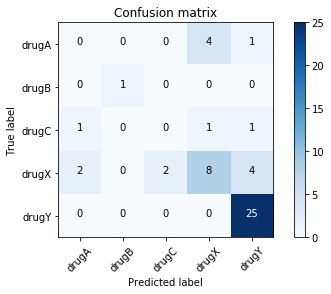

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_validation, y_pred, labels=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'])
np.set_printoptions(precision=2)

print (classification_report(y_validation, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],normalize= False,  title='Confusion matrix')

You can also easily use the __f1_score__ from sklearn library:

In [0]:
from sklearn.metrics import f1_score
f1_score(y_validation, y_pred, average='weighted') 

0.6429802955665025

Lets try jaccard index for accuracy:

In [0]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_validation, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.68

In [0]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
y_pred2 = clf2.predict(X_validation)
print("Avg F1-score: %.4f" % f1_score(y_validation, y_pred2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_validation, y_pred2))

Avg F1-score: 0.7329
Jaccard score: 0.7800


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [0]:
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train, y_train) 
y_pred3 = clf2.predict(X_validation)
print("Avg F1-score: %.4f" % f1_score(y_validation, y_pred3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_validation, y_pred3))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Avg F1-score: 0.7329
Jaccard score: 0.7800


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


<h2>Pros and Cons of Support Vector Machine</h2>

<h3> Pros </h3>
* Because it uses a subset of training points, it tends to be more efficient <br>
* Has high accuracy. <br>
* Performs really well on smaller/cleaner datasets. <br>

<h3> Cons </h3>
* Not a great fit for larger datasets <br>
* Training time with SVMs can be high. <br>
* Not very effective on datasets with overlapping classes. <br>

<h3>Thanks for reading!</h3>

<h4>Author:  <a href="https://www.linkedin.com/in/ademolabuwo">Ademola Arigbabuwo</a></h4>
